In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from seaborn           import heatmap
import time
import time
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv("HR_Employee_Attrition_Data.csv")
print(df.shape)
print(df.columns)

(2940, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# to count the number of employees that stayed and left the company
df['Attrition'].value_counts()

No     2466
Yes     474
Name: Attrition, dtype: int64

In [6]:
df_hr=df

<AxesSubplot:title={'center':'Count of different gender'}>

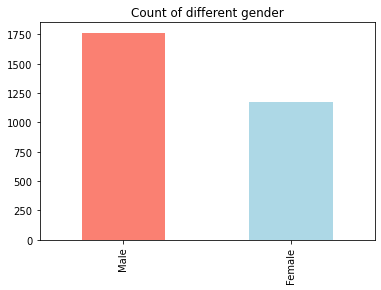

In [7]:
df['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

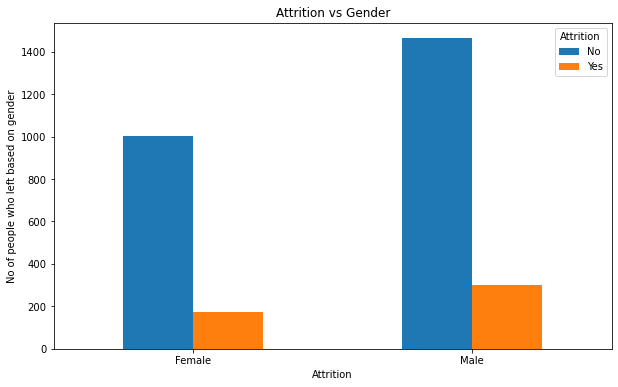

In [8]:
pd.crosstab(df['Gender'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.xticks(rotation=0)

Text(0, 0.5, 'No of people who left based on MaritalStatus')

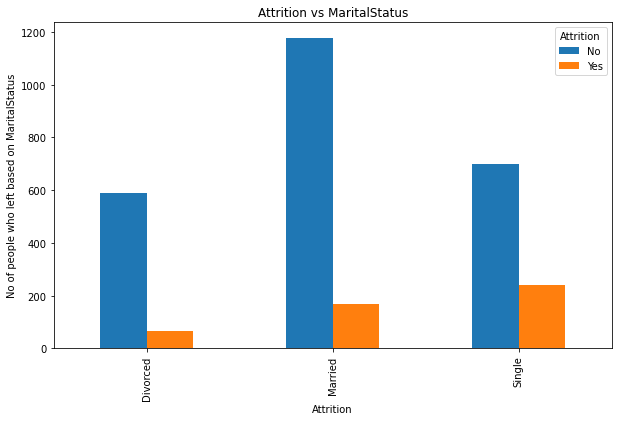

In [9]:
pd.crosstab(df['MaritalStatus'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs MaritalStatus")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on MaritalStatus")
# plt.xticks(rotation=0)

In [10]:
df['OverTime'].value_counts()

No     2108
Yes     832
Name: OverTime, dtype: int64

<AxesSubplot:title={'center':'OverTime'}>

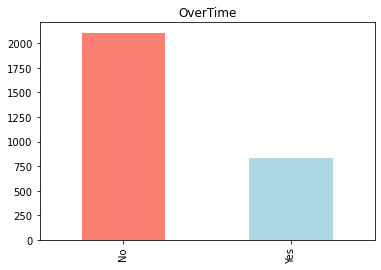

In [11]:
df['OverTime'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="OverTime")

In [1]:
pd.crosstab(df['OverTime'],df['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Overtime")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on Overtime")
# plt.xticks(rotation=0)

NameError: name 'pd' is not defined

# defining X and y

In [13]:
X=df_hr.drop(labels=['Attrition'], axis=1)
y=df_hr['Attrition']
names_index =X.columns

# identify categorical variables

In [14]:
cat= X.select_dtypes(include=['object']).columns.tolist()
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [2]:
# for col in X.columns:
#     print(col, ':', len(X[col].unique()), 'labels')     # to find the number of unique values in each column

# one hot encoding

In [16]:
# number of new columms that will be formed after onehot encoding
pd.get_dummies(df_hr, drop_first=True).shape

(2940, 48)

In [17]:
# converting categorical data into dummy variables
data= df_hr[cat]
# data
df_dummies= pd.get_dummies(data)
df_dummies

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2936,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2937,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2938,0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0


In [18]:
# merging the dummy variables into the dataset
df_merged= pd.concat([df_hr, df_dummies], axis='columns')
df_merged.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
      

In [19]:
# drop the original categorical columns
df_fin = df_merged.drop(data, axis='columns')
df_fin.shape

(2940, 56)

# train and test split

In [20]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df_fin.drop(labels=['Attrition'], axis=1),
    df_fin['Attrition'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2058, 55), (882, 55))

# zero variance check

In [21]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)


VarianceThreshold(threshold=0)

In [22]:
var_thres.get_support()


array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [23]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])


52

3


In [25]:
for column in constant_columns:
    print(column)


EmployeeCount
StandardHours
Over18_Y


In [26]:
X_train= X_train.drop(constant_columns,axis=1)
X_test= X_test.drop(constant_columns,axis=1)

In [27]:
X_train.shape

(2058, 52)

# checking correlation

In [28]:
corrmat= X_train.corr()
corrmat


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,-0.020380,0.000794,0.204864,-0.034623,0.019948,0.021202,0.036179,0.517645,0.006325,...,0.046800,0.198432,-0.143200,0.000516,-0.173893,0.007837,0.102952,-0.117318,-0.034181,0.034181
DailyRate,-0.020380,1.000000,-0.000705,-0.002394,-0.018115,0.027603,0.011388,0.043337,-0.009224,0.043502,...,0.016456,0.007801,0.001568,-0.011853,-0.018774,0.025941,0.023901,-0.048752,-0.035249,0.035249
DistanceFromHome,0.000794,-0.000705,1.000000,0.026355,0.022184,-0.014255,0.037235,0.020472,0.001519,-0.016024,...,0.031613,-0.017358,-0.000291,0.015126,-0.006053,-0.005229,0.010411,-0.006493,-0.028962,0.028962
Education,0.204864,-0.002394,0.026355,1.000000,0.008811,-0.056821,0.008668,0.065097,0.096907,0.001278,...,-0.019923,0.059639,0.011513,0.060560,-0.066032,-0.034034,0.007265,0.022571,0.038247,-0.038247
EmployeeNumber,-0.034623,-0.018115,0.022184,0.008811,1.000000,0.015851,0.010979,0.013189,-0.036020,-0.041380,...,-0.019581,-0.024785,0.003164,0.008267,0.011910,-0.014303,0.027032,-0.016210,0.009349,-0.009349
EnvironmentSatisfaction,0.019948,0.027603,-0.014255,-0.056821,0.015851,1.000000,-0.048378,-0.025447,-0.000656,-0.005941,...,0.074415,-0.048829,-0.011204,-0.054562,0.024352,0.007832,-0.013160,0.007117,-0.069399,0.069399
HourlyRate,0.021202,0.011388,0.037235,0.008668,0.010979,-0.048378,1.000000,0.057822,-0.033393,-0.058415,...,-0.006119,-0.019805,0.013781,-0.002097,-0.013123,-0.014714,0.041454,-0.031300,0.011676,-0.011676
JobInvolvement,0.036179,0.043337,0.020472,0.065097,0.013189,-0.025447,0.057822,1.000000,-0.008159,-0.018439,...,-0.014609,0.018418,0.030746,-0.016927,-0.019471,0.019649,0.009510,-0.027718,0.005367,-0.005367
JobLevel,0.517645,-0.009224,0.001519,0.096907,-0.036020,-0.000656,-0.033393,-0.008159,1.000000,0.005447,...,0.131791,0.400479,-0.386093,0.122550,-0.221749,0.010660,0.071565,-0.086200,0.021939,-0.021939
JobSatisfaction,0.006325,0.043502,-0.016024,0.001278,-0.041380,-0.005941,-0.058415,-0.018439,0.005447,1.000000,...,-0.008880,-0.024490,0.009249,0.010948,0.017196,-0.039815,0.008327,0.026591,-0.033426,0.033426


In [29]:
# to select the highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

7

In [31]:
corr_features

{'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [1]:
# from numpy.random      import randn
# from pandas            import DataFrame
# from seaborn           import heatmap
# from matplotlib.pyplot import show
# from itertools         import combinations

# def absHighPass(df, absThresh):
#     passed = set()
#     for (r,c) in combinations(df.columns, 2):
#         if (abs(df.loc[r,c]) >= absThresh):
#             passed.add(r)
#             passed.add(c)
#     passed = sorted(passed)
#     return df.loc[passed,passed]

# labels = [chr(x) for x in range(65,91)]
# corrDf = X_train.corr()
# sns.set(font_scale=0.35)

# sns.set(rc={'figure.figsize':(12.7,10.27)})
# #heatmap(corrDf,cmap="YlGnBu")
# heatmap(absHighPass(corrDf,0.7),cmap="YlGnBu", annot=True)
# show()

In [33]:
# dropping the correlated features
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

In [34]:
X_test.shape

(882, 45)

In [35]:
X_train.shape

(2058, 45)

# standardization

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier.predict(X_test)


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[714  23]
 [ 78  67]]


0.8854875283446711

# decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
model_dt = DecisionTreeClassifier()

# hyperparameter tuning for decision tree`

In [42]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [20,25,30,35,40],
              'min_samples_split':[4,8,12,16],
              'min_samples_leaf': [1,2,3,4,5],
              'criterion': ['gini', 'entropy']}

cv_dt = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_dt.fit(X_train, y_train)
                   
print('Best Parameters using grid search: \n', cv_dt.best_params_)
                   
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 4}
Time taken in grid search:  50.24


In [43]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth= 20, min_samples_leaf= 1, min_samples_split= 4)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
y_prob_dt=  model_dt.predict_proba(X_test)[:,1]


In [44]:
accuracy= accuracy_score(y_test, y_pred_dt)
accuracy

0.9160997732426304

# Confusion matrix

In [45]:
def create_conf_mat(y_test, y_pred_dt):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(y_pred_dt.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != y_pred_dt.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = y_pred_dt)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

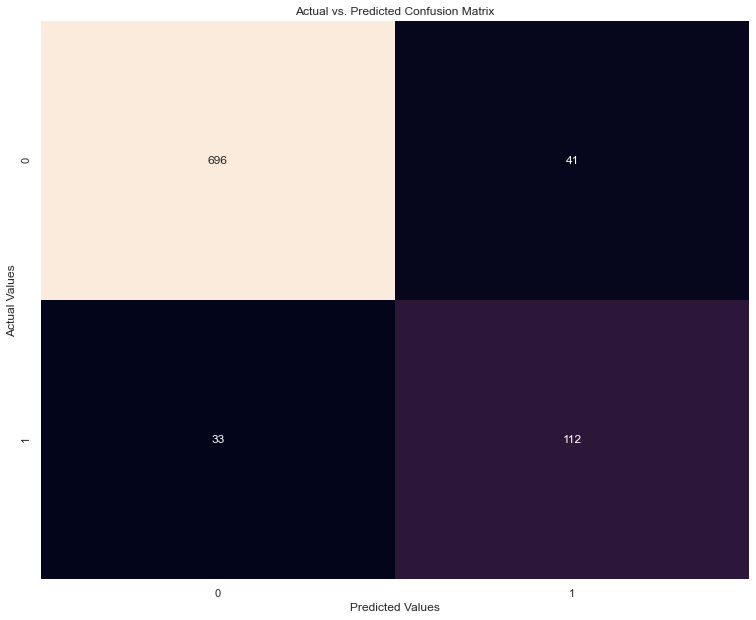

In [46]:
conf_mat = create_conf_mat(y_test, y_pred_dt)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt,pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print(tpr_dt)

[nan nan nan nan nan nan]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


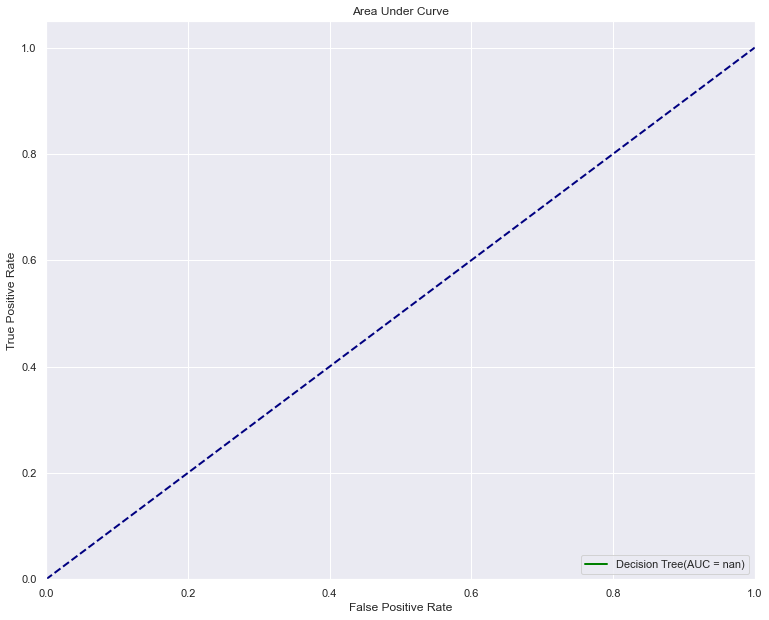

In [48]:
plt.figure()
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

NameError: name 'plot_roc_curve' is not defined

# random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()

# hyperparameter tuning using Grid search CV

In [ ]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,15,20,25,30],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2','None'],
              'criterion': ['gini']}

cv_rf = GridSearchCV(model_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

In [ ]:
model_rf.set_params(criterion = 'gini',
                  max_features = 'sqrt', 
                  max_depth = 30)

# OOB error calculation

In [ ]:
model_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 101
max_estimators = 700

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    model_rf.set_params(n_estimators=i)
    model_rf.fit(X_train,y_train)

    oob_error = 1 - model_rf.oob_score_
    error_rate[i] = oob_error

In [ ]:
oob_series = pd.Series(error_rate)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.06, color='#875FDB',linestyle='--')
plt.axhline(0.03, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [ ]:
print('OOB Error rate for 450 trees is: {0:.5f}'.format(oob_series[450]))

In [ ]:
# Refine the tree via OOB Output
model_rf.set_params(n_estimators=450,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

In [ ]:
model_rf.fit(X_train, y_train)

In [ ]:
predictions_rf = model_rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, predictions_rf)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

In [ ]:
def create_conf_mat(y_test, predictions_rf):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions_rf.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions_rf.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions_rf)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

In [ ]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# VARIABLE IMPORTANCE

In [ ]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [ ]:
var_imp_rf = variable_importance(model_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [ ]:
def print_var_importance(importance, indices, names_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [ ]:
print_var_importance(importances_rf, indices_rf, names_index)

In [ ]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

In [ ]:
variable_importance_plot(importances_rf, indices_rf, names_index)

# Area under the curve

In [ ]:
pred_prob_dt = model_dt.predict_proba(X_test)
pred_prob_rf = model_rf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_dt[:,1], pos_label=el=el=1)
print(tpr2)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_dt[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1])

print(auc_score1, auc_score2)


In [ ]:
roc_auc_dt = auc(fpr1, tpr1)
roc_auc_dt

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.plot(fpr)